# **Import Data**

In [11]:
pip install ucimlrepo

In [12]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
seoul_bike_sharing_demand = fetch_ucirepo(id=560)

# data (as pandas dataframes)
X = seoul_bike_sharing_demand.data.features
y = seoul_bike_sharing_demand.data.targets

# metadata
print(seoul_bike_sharing_demand.metadata)

# variable information
print(seoul_bike_sharing_demand.variables)


{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and a

# **Data Preprocessing**

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns


sns.set(style="whitegrid", palette="Set2")

In [14]:
# Quick look at the data
print(X.head())
print(y.head())
print(X.info())
print(X.describe())

        Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0  1/12/2017                254     0         -5.2        37         2.2   
1  1/12/2017                204     1         -5.5        38         0.8   
2  1/12/2017                173     2         -6.0        39         1.0   
3  1/12/2017                107     3         -6.2        40         0.9   
4  1/12/2017                 78     4         -6.0        36         2.3   

   Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday  
0  Winter  No Holiday  
1  Winter  No Holiday  
2  Winte

In [15]:
#Recombining Features and Target for Analysis

df = pd.concat([X, y], axis=1)
print(df.columns)

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
       'Wind speed', 'Visibility', 'Dew point temperature', 'Solar Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day'],
      dtype='object')


In [16]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y') # Changed the format string to match the actual format
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday
df.drop(columns=['Date'], inplace=True)

In [17]:
#encoding categorical variables
df = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day'], drop_first=True)

In [18]:
#check for missing values

print(df.isnull().sum())

Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Month                    0
Day                      0
Weekday                  0
Seasons_Spring           0
Seasons_Summer           0
Seasons_Winter           0
Holiday_No Holiday       0
Functioning Day_Yes      0
dtype: int64


# **Standardization & Colinearity**

In [19]:
#standardizing numerical values

scaler = StandardScaler()
num_cols = df.select_dtypes(include=[np.number]).columns.drop('Rented Bike Count')
df[num_cols] = scaler.fit_transform(df[num_cols])

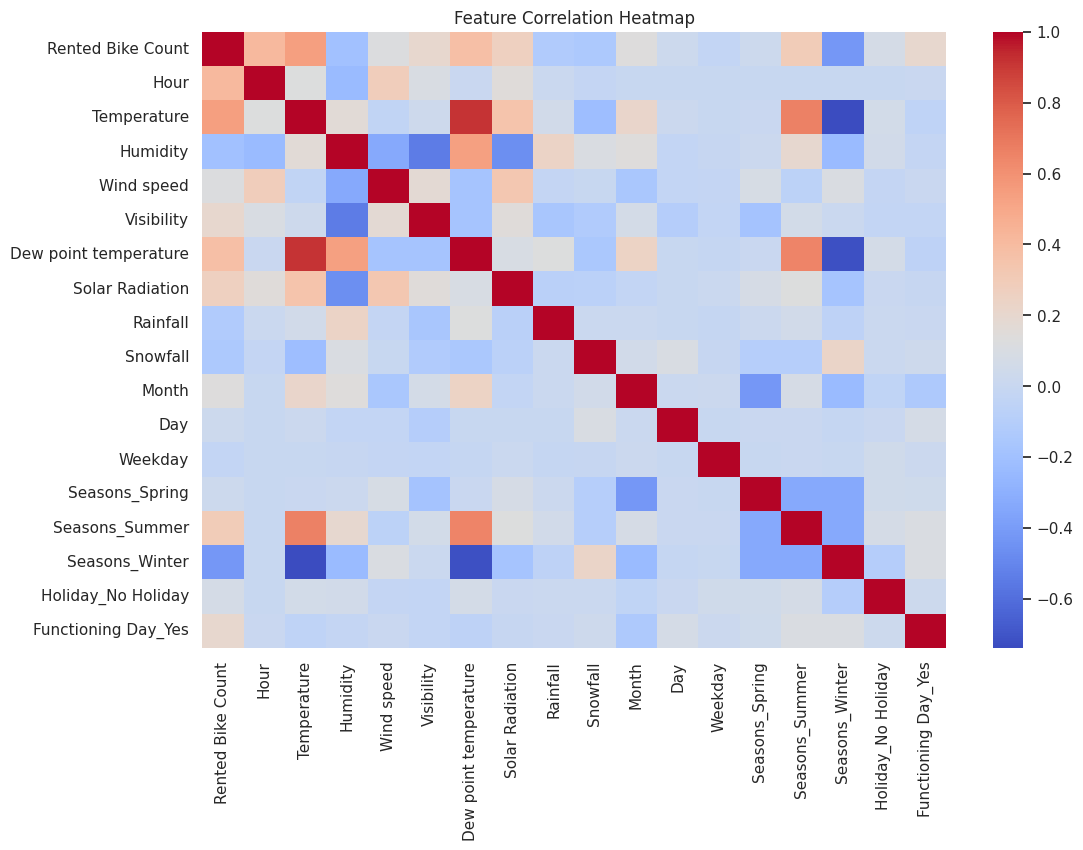

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# **Additional Visualization**

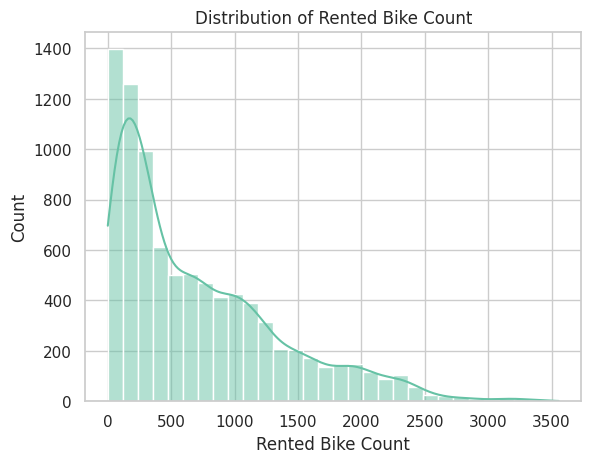

In [22]:
#target distirbution
sns.histplot(df['Rented Bike Count'], kde=True, bins=30)
plt.title("Distribution of Rented Bike Count")
plt.show()

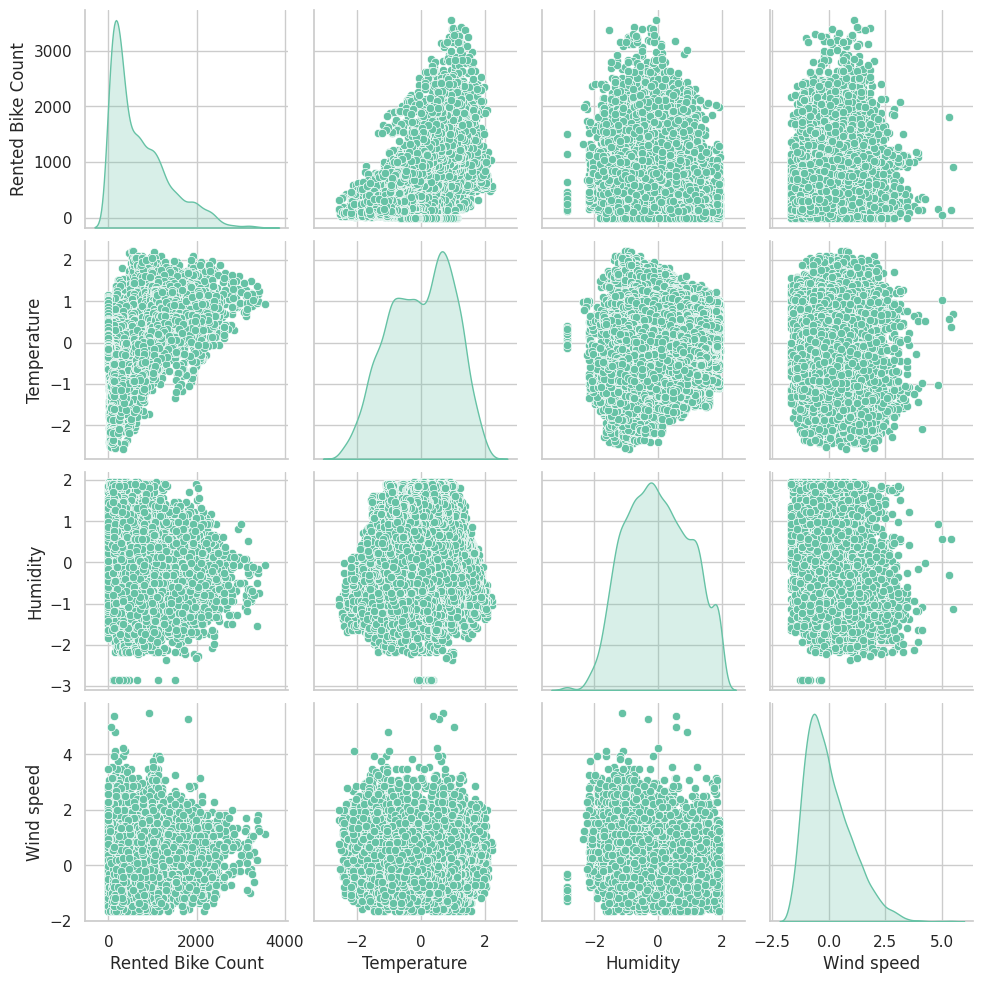

In [25]:
#pairplot for some features

sample_cols = ['Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed']
sns.pairplot(df[sample_cols], diag_kind='kde')
plt.show()

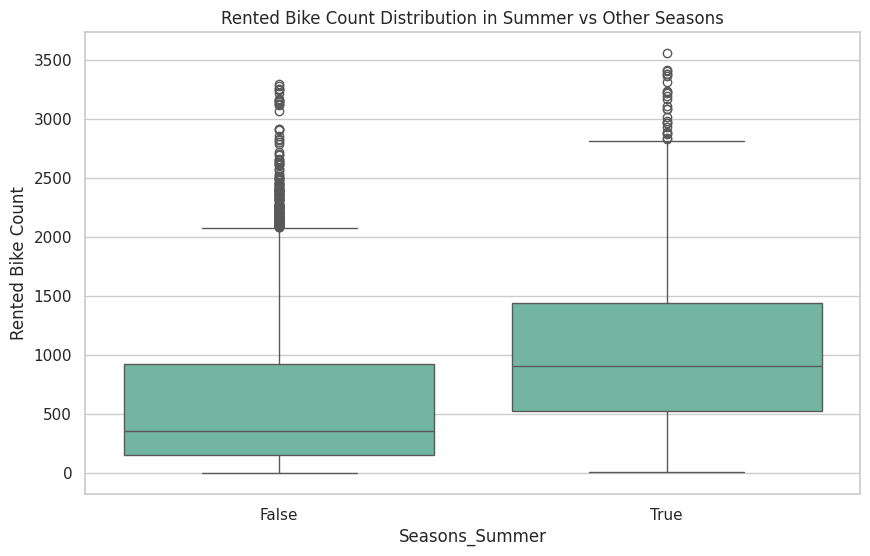

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons_Summer', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count Distribution in Summer vs Other Seasons')
plt.show()

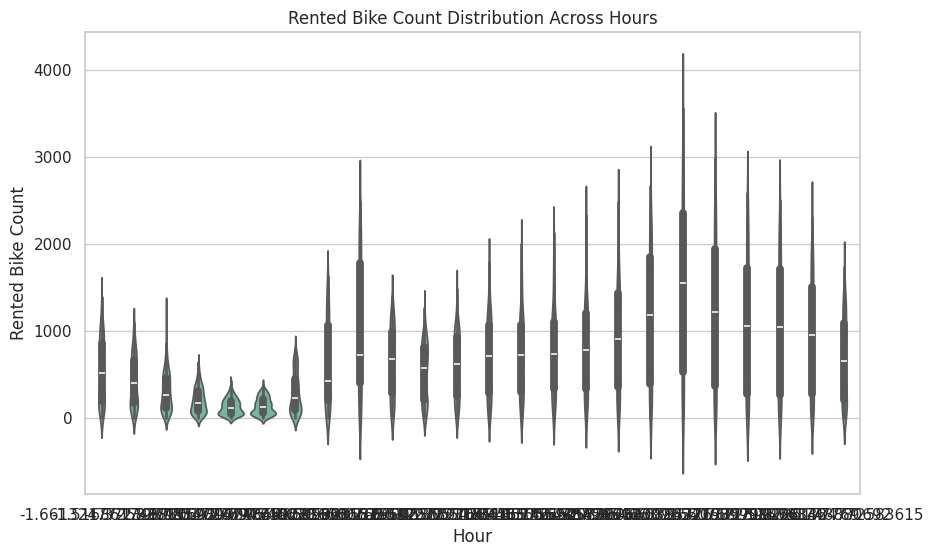

In [29]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Hour', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count Distribution Across Hours')
plt.show()

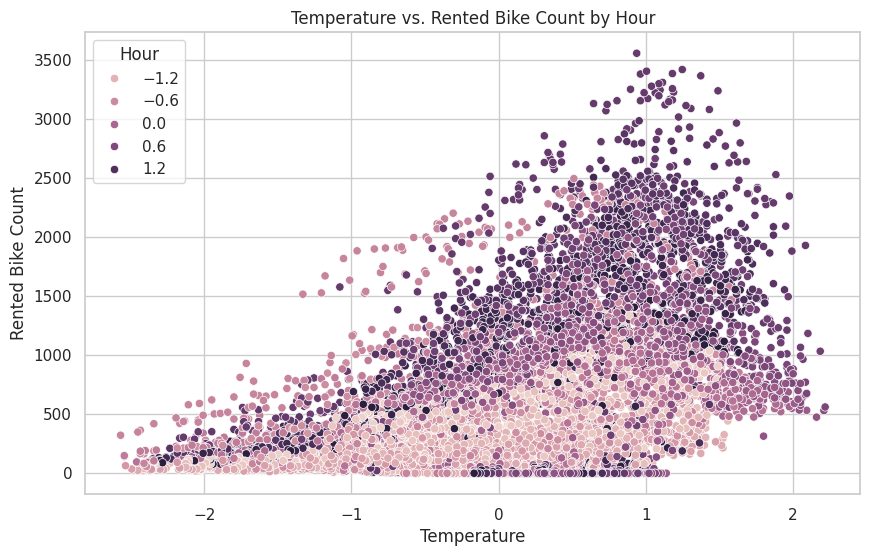

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Rented Bike Count', hue='Hour', data=df)
plt.title('Temperature vs. Rented Bike Count by Hour')
plt.show()

In [26]:
# Separate features and target
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

# Split into train (60%), eval (20%), test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)